#  <font color='Coral'>  Import necessary libraries

We use 5 libraries. *Numpy* to simplify our computation, *ast* to obtain a list from **txt**, pandas to use data, matplotlib to plot the figures, and networkX to create draw **Graphs**.


First it is necassry to obtain data from our source. To do that, we use 
*open* command and open the txt file as read-only (*open('txt_file_path', 'r')*). Then we use *.read* method to obtain a single line (which is the only line) of the files (*open(...).read()*)
. Then we can use the *literal_eval* method of *ast* to obtain the actual list which is the used in our Graph (*ast.literal_eval(open(...).read())*). 

Do this step for both *edge_idx.txt* and *node_lbls.txt* files and obtain the list within them. It might have been easier to copy paste the whole text in python coding enviroment.

In [2]:
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

path_edge_idx  = '../Data/NetworkX/edge_idx.txt'
path_node_lbls = '../Data/NetworkX/node_lbls.txt'

edge_idx  = ast.literal_eval(open(path_edge_idx , 'r').read())
node_lbls = ast.literal_eval(open(path_node_lbls, 'r').read())



##  <font color='Coral'> Create Graph

We can create our graph using 
*nx.Graph()*
and add edges from the file which we previously obtained. We can also add the nodes which are from 0 to 34. It is not necessary to add these nodes since by adding the edges, nodes have also been added. 

To add edges from the list, we use 
*add_edges_from()* method of the Graph and give the obtained *edge_idx* list as its argument. 
The same happens with *add_nodes_from()* but with a list of 0 to 34 as its argument. 

In [3]:
G = nx.Graph()
G.add_edges_from(edge_idx)
G.add_nodes_from(range(0,35)) # not necessary

## <font color='Coral'>  Graph Info

Interesting Informaton of the Graph can be obtained using
*.info* method such as how many nodes or edges it contains.

In [4]:
nx.info(G)

C:\Users\A.M.Kharazi\AppData\Local\Temp\ipykernel_7176\1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 35 nodes and 74 edges'

## <font color='Coral'> Other Info

*.info* is not the only way to obtain information about the graph. *G.edges* return tuples of each source-target edge, 
*G.nodes* return a list of graph nodes. *G.degree* return the degree of each node in the graph which is how many connection it contains with other nodes. *G.degree* return tuples of (node, degree).

In [5]:
print("Graph Edges : ", G.edges)
print("Number of Edges : ", len(G.edges))
print("Graph Nodes : ", G.nodes)
print("Number of Nodes : ", len(G.nodes))
print("Each node's Degree : ", G.degree)

Graph Edges :  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 11), (0, 12), (0, 13), (0, 16), (0, 19), (0, 20), (0, 21), (0, 23), (1, 2), (1, 3), (1, 5), (1, 7), (1, 14), (1, 17), (1, 28), (1, 32), (2, 6), (2, 8), (2, 10), (2, 13), (2, 27), (2, 29), (2, 31), (3, 7), (3, 11), (3, 13), (3, 32), (4, 10), (4, 31), (5, 10), (5, 15), (6, 16), (13, 32), (19, 33), (20, 32), (20, 33), (23, 8), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (7, 30), (14, 33), (28, 26), (28, 31), (28, 33), (32, 15), (32, 18), (32, 22), (32, 29), (32, 31), (32, 33), (8, 22), (8, 34), (27, 24), (27, 33), (31, 15), (31, 24), (31, 25), (31, 30), (31, 33), (30, 33), (22, 33), (9, 33), (33, 18), (33, 26), (25, 24)]
Number of Edges :  74
Graph Nodes :  [0, 1, 2, 3, 4, 5, 6, 11, 12, 13, 16, 19, 20, 21, 23, 7, 14, 17, 28, 32, 8, 10, 27, 29, 31, 15, 30, 22, 9, 33, 34, 18, 25, 24, 26]
Number of Nodes :  35
Each node's Degree :  [(0, 14), (1, 9), (2, 9), (3, 6), (4, 3), (5, 4), (6, 3), (11, 2), (12, 1), (13, 4), (16

## <font color='Coral'> Other information - part 2

*G.adj* or *G.neighbors* both give the same result but neighbors are more easily understood. For each node in our node list (*G.node*) we obtain its every neighbor via
*G.neighbor(node)*
. Each neighbor means a connection. That is the goal of this box of code is to obtain connections of each node.

In [6]:
for node in G.nodes:
  print("Node ", node ,
        "Neighbors are (have a connection with) : ",
        end = " ")
  for neighbor in G.neighbors(node):
    print(neighbor, end = " ")
  print("")

Node  0 Neighbors are (have a connection with) :  1 2 3 4 5 6 11 12 13 16 19 20 21 23 
Node  1 Neighbors are (have a connection with) :  0 2 3 5 7 14 17 28 32 
Node  2 Neighbors are (have a connection with) :  0 1 6 8 10 13 27 29 31 
Node  3 Neighbors are (have a connection with) :  0 1 7 11 13 32 
Node  4 Neighbors are (have a connection with) :  0 10 31 
Node  5 Neighbors are (have a connection with) :  0 1 10 15 
Node  6 Neighbors are (have a connection with) :  0 2 16 
Node  11 Neighbors are (have a connection with) :  0 3 
Node  12 Neighbors are (have a connection with) :  0 
Node  13 Neighbors are (have a connection with) :  0 2 3 32 
Node  16 Neighbors are (have a connection with) :  0 6 
Node  19 Neighbors are (have a connection with) :  0 33 
Node  20 Neighbors are (have a connection with) :  0 32 33 
Node  21 Neighbors are (have a connection with) :  0 
Node  23 Neighbors are (have a connection with) :  0 8 25 27 29 32 33 
Node  7 Neighbors are (have a connection with) :  1 3

## <font color='Coral'> Required yet used later

These set of codes are later used to plot different figures. 

To change labels of each node, we need dictionaries. To create the appropriate dictionary, node_lbls is used.
For each node in the set of *.nodes*
, we obtain its label from *node_lbls* file.


Sometimes it is not all clean to use numbers as labels; Instead we use node coloring to distinguish different labels. For each node in the set of *.nodes*, if the label of that node is 1 the it is greenish and if it is 0 then it will be redish. 

To change the visual size of each node we use two methods. Method 1 which is *_node_size_1* is basically changing the size of each node based on its degree. Since  maximum degree for this Graph is low, we use a **weight** variable to increase this difference. Weight variable is set to 15.
For each node in the list of degree tuples (*G.degree*) we obtain its degree and multiply it by weight value and add it to the size list which will be used to visualize the graph.

The other method *_node_size_2*
uses a similar method but it also factor the labels of each neighbor that is only neighbors of same labels are considered toward degree. To obtain this idea, For each node in the list of *.nodes* we set the initial size to 0 and then calculate label of its neighbor and if they were the same, the size would be increased. 
Later we use the same weight variable to increase the size a bit.

In [7]:
labels_dict = {}
for node in G.nodes:
  labels_dict[node] = node_lbls[node] 

_node_color = []
for node in G.nodes:
  if node_lbls[node]== 1:
    _node_color.append('springgreen')
  else:
    _node_color.append('lightcoral')

_node_size_1 = []
weight = 15
for node in G.degree:
  _node_size_1.append(node[1]*weight)


_node_size_2 = []
weight = 15
for node in G.nodes:
  size = 0
  for neighbor in G.neighbors(node):
    if node_lbls[neighbor] == node_lbls[node]:
      size+=1
  _node_size_2.append(size*weight)

## <font color='Coral'> Figure 1

Simple draw of the Graph. no labels, no nothing. Just a circular draw of the graph.

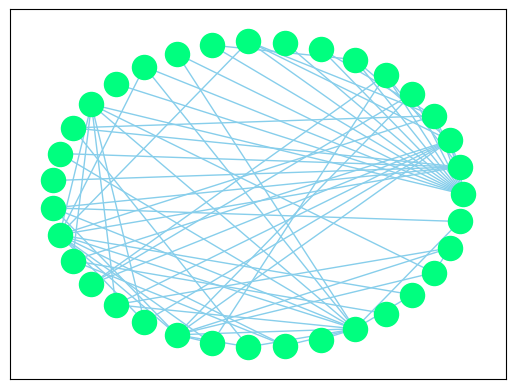

In [8]:
plt.figure(1)
nx.draw_networkx(
    G,
    node_color='springgreen',
    edge_color='skyblue',
    pos = nx.circular_layout(G),
    with_labels = False
)
plt.show()

## <font color='Coral'> Figure 2

Still the same simple graph but this time with labels.

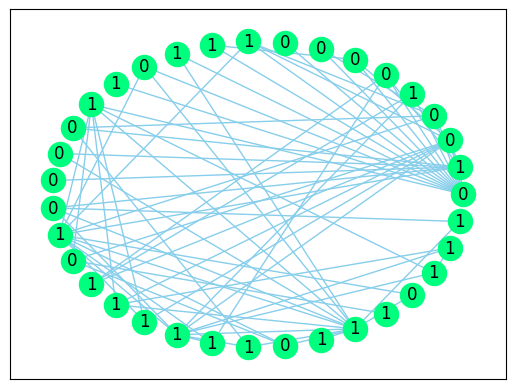

In [11]:
plt.figure(2)
nx.draw_networkx(
    G,
    node_color='springgreen',
    edge_color='skyblue',
    pos = nx.circular_layout(G),
    labels = labels_dict,
    with_labels = True
)
plt.show()

## <font color='Coral'> Figure 3

Graph with colored nodes according to its labels.

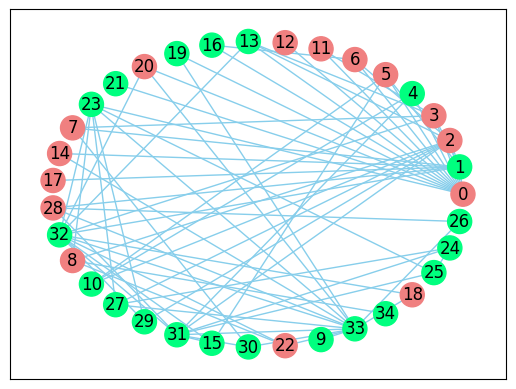

In [12]:
plt.figure(3)
nx.draw_networkx(
    G,
    node_color= _node_color,
    edge_color='skyblue',
    pos = nx.circular_layout(G),
    with_labels = True
)
plt.show()

## <font color='Coral'> Figure 4,5

Graph with and without colored labels and with different sizes using first method *_node_size_1*

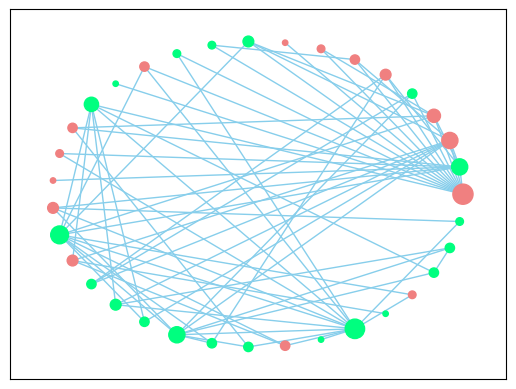

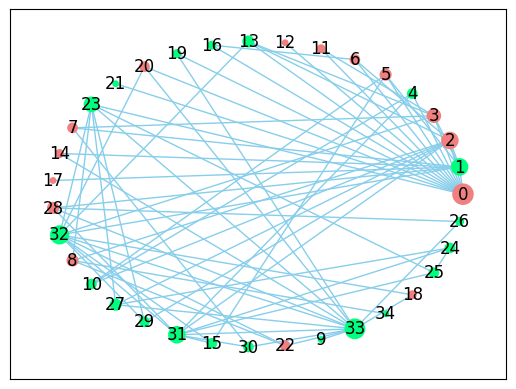

In [13]:
plt.figure(4)
nx.draw_networkx(
    G,
    node_size = _node_size_1,
    node_color= _node_color,
    edge_color='skyblue',
    pos = nx.circular_layout(G),
    with_labels = False
)
plt.figure(5)
nx.draw_networkx(
    G,
    node_size = _node_size_1,
    node_color= _node_color,
    edge_color='skyblue',
    pos = nx.circular_layout(G),
    with_labels = True
)
plt.show()

## <font color='Coral'> Figure 6,7

Graph with and without colored labels with different sizes using the second method *_node_size_2*

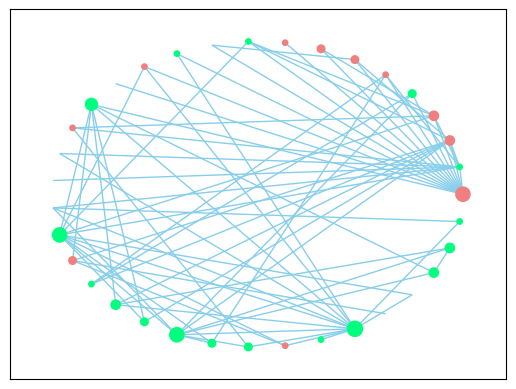

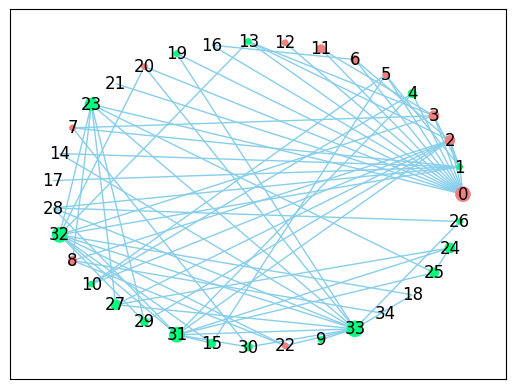

In [14]:
plt.figure(6)
nx.draw_networkx(
    G,
    node_size = _node_size_2,
    node_color= _node_color,
    edge_color='skyblue',
    pos = nx.circular_layout(G),
    with_labels = False
)
plt.figure(7)
nx.draw_networkx(
    G,
    node_size = _node_size_2,
    node_color= _node_color,
    edge_color='skyblue',
    pos = nx.circular_layout(G),
    with_labels = True
)
plt.show()  